## **Machine Learning for Classification**

We'll use logistic regression to predict churn

### **1. Data Preparation**

- Download the data, read it with pandas
- Look at the data
- Make column names and values look uniform
- Check if all the columns read correctly
- Check if the churn variable needs any preparation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")
%matplotlib inline


In [2]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv'

In [3]:
!wget $data -O data_week_3.csv

--2023-10-02 20:00:25--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 977501 (955K) [text/plain]
Saving to: 'data_week_3.csv'

     0K .......... .......... .......... .......... ..........  5%  673K 1s
    50K .......... .......... .......... .......... .......... 10% 1.87M 1s
   100K .......... .......... .......... .......... .......... 15% 1.17M 1s
   150K .......... .......... .......... .......... .......... 20% 1.65M 1s
   200K .......... .......... .......... .......... .......... 26% 3.06M 1s
   250K .......... .......... .......... .......... .......... 31% 2.12M 0s
   300K .......... .......... .......... ....

In [4]:
df = pd.read_csv('data_week_3.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
# standarize columns by lower case and using underscore
df.columns = df.columns.str.lower().str.replace(" ", "_")

# standarize the value of categorical columns by lower case and using underscore
categorical_columns = list(df.dtypes[df.dtypes == "object"].index)
for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(" ", "_")

In [6]:
df.head().T

,0,1,2,3,4
customerid,7590-vhveg,5575-gnvde,3668-qpybk,7795-cfocw,9237-hqitu
gender,female,male,male,male,female
seniorcitizen,0,0,0,0,0
partner,yes,no,no,no,no
dependents,no,no,no,no,no
tenure,1,34,2,45,2
phoneservice,no,yes,yes,no,yes
multiplelines,no_phone_service,no,no,no_phone_service,no
internetservice,dsl,dsl,dsl,dsl,fiber_optic
onlinesecurity,no,yes,yes,yes,no


In [7]:
df.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges         object
churn                object
dtype: object

In [8]:
df['totalcharges'] = pd.to_numeric(df['totalcharges'], errors='coerce')


In [9]:
df.isnull().sum()

customerid           0
gender               0
seniorcitizen        0
partner              0
dependents           0
tenure               0
phoneservice         0
multiplelines        0
internetservice      0
onlinesecurity       0
onlinebackup         0
deviceprotection     0
techsupport          0
streamingtv          0
streamingmovies      0
contract             0
paperlessbilling     0
paymentmethod        0
monthlycharges       0
totalcharges        11
churn                0
dtype: int64

In [10]:
df[df['totalcharges'].isnull()][['customerid', 'totalcharges']]

,customerid,totalcharges
488,4472-lvygi,NaN
753,3115-czmzd,NaN
936,5709-lvoeq,NaN
1082,4367-nuyao,NaN
1340,1371-dwpaz,NaN
3331,7644-omvmy,NaN
3826,3213-vvolg,NaN
4380,2520-sgtta,NaN
5218,2923-arzlg,NaN
6670,4075-wkniu,NaN


In [11]:
df['totalcharges'] = df['totalcharges'].fillna(0)
df.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [12]:
df['churn'].head()

0     no
1     no
2    yes
3     no
4    yes
Name: churn, dtype: object

In [13]:
df['churn'] = (df['churn'] == 'yes').astype(int)
df['churn'].head()

0    0
1    0
2    1
3    0
4    1
Name: churn, dtype: int32

### **2. Setting up the Validation Framework**

- Perform the train/validation/test split with Scikit-Learn

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)

In [16]:
len(df_full_train), len(df_test)

(5634, 1409)

In [17]:
# The test size is 0.25 derived from 20%(val)/80%(full_train) since the validation distribution is 20% of full dataset
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [18]:
len(df_train), len(df_val), len(df_test)

(4225, 1409, 1409)

In [19]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [20]:
y_train = df_train['churn'].values
y_val = df_val['churn'].values
y_test = df_test['churn'].values

In [21]:
df_train = df_train.drop(columns='churn')
df_val = df_val.drop(columns='churn')
df_test = df_test.drop(columns='churn')

### **3. EDA**

- Check missing values
- Look at the target variable (churn)
- Look at numerical and categorical variables

In [22]:
df_full_train = df_full_train.reset_index(drop=True)

In [23]:
global_churn_rate = df_full_train['churn'].value_counts(normalize=True).loc[1]
round(global_churn_rate, 2)

0.27

In [24]:
df_full_train.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges        float64
churn                 int32
dtype: object

In [25]:
df_full_train.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [26]:
numerical_vars = ['tenure', 'monthlycharges', 'totalcharges']
categorical_vars = ['gender', 'seniorcitizen', 'partner', 'dependents',
       'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod']

In [27]:
df[categorical_vars].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

### **4. Feature Importance: Churn Rate and Risk Ratio**

- Churn rate
- Risk ratio
- Mutual information - later

**Churn Rate**

In [28]:
df_full_train.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,5442-pptjy,male,0,yes,yes,12,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.70,258.35,0
1,6261-rcvns,female,0,no,no,42,yes,no,dsl,yes,...,yes,yes,no,yes,one_year,no,credit_card_(automatic),73.90,3160.55,1
2,2176-osjuv,male,0,yes,no,71,yes,yes,dsl,yes,...,no,yes,no,no,two_year,no,bank_transfer_(automatic),65.15,4681.75,0
3,6161-erdgd,male,0,yes,yes,71,yes,yes,dsl,yes,...,yes,yes,yes,yes,one_year,no,electronic_check,85.45,6300.85,0
4,2364-ufrom,male,0,no,no,30,yes,no,dsl,yes,...,no,yes,yes,no,one_year,no,electronic_check,70.40,2044.75,0


In [29]:
churn_female = df_full_train[df_full_train['gender'] == 'female']['churn'].value_counts(normalize=True).loc[1]
churn_female

0.27682403433476394

In [30]:
churn_male = df_full_train[df_full_train['gender'] == 'male']['churn'].value_counts(normalize=True).loc[1]
churn_male

0.2632135306553911

In [31]:
global_churn_rate

0.26996805111821087

In [32]:
churn_partner = df_full_train[df_full_train['partner'] == 'yes']['churn'].value_counts(normalize=True).loc[1]
churn_partner

0.20503330866025166

In [33]:
global_churn_rate - churn_partner

0.06493474245795922

In [34]:
churn_no_partner = df_full_train[df_full_train['partner'] == 'no']['churn'].value_counts(normalize=True).loc[1]
churn_no_partner

0.3298090040927694

In [35]:
global_churn_rate - churn_no_partner

-0.05984095297455855

**Risk Ratio**

In [36]:
churn_partner / global_churn_rate

0.7594724924338315

In [37]:
churn_no_partner / global_churn_rate

1.2216593879412643

In [38]:
for c in categorical_vars:
    df_group = df_full_train.groupby(c)['churn'].agg(['mean', 'count'])
    df_group['global_churn'] = global_churn_rate
    df_group['diff'] = df_group['mean'] - df_group['global_churn']
    df_group['ratio'] = df_group['mean'] / df_group['global_churn']
    display(df_group)

,mean,count,global_churn,diff,ratio
gender,,,,,
female,0.276824,2796,0.269968,0.006856,1.025396
male,0.263214,2838,0.269968,-0.006755,0.974980


,mean,count,global_churn,diff,ratio
seniorcitizen,,,,,
0,0.242270,4722,0.269968,-0.027698,0.897403
1,0.413377,912,0.269968,0.143409,1.531208


,mean,count,global_churn,diff,ratio
partner,,,,,
no,0.329809,2932,0.269968,0.059841,1.221659
yes,0.205033,2702,0.269968,-0.064935,0.759472


,mean,count,global_churn,diff,ratio
dependents,,,,,
no,0.313760,3968,0.269968,0.043792,1.162212
yes,0.165666,1666,0.269968,-0.104302,0.613651


,mean,count,global_churn,diff,ratio
phoneservice,,,,,
no,0.241316,547,0.269968,-0.028652,0.893870
yes,0.273049,5087,0.269968,0.003081,1.011412


,mean,count,global_churn,diff,ratio
multiplelines,,,,,
no,0.257407,2700,0.269968,-0.012561,0.953474
no_phone_service,0.241316,547,0.269968,-0.028652,0.893870
yes,0.290742,2387,0.269968,0.020773,1.076948


,mean,count,global_churn,diff,ratio
internetservice,,,,,
dsl,0.192347,1934,0.269968,-0.077621,0.712482
fiber_optic,0.425171,2479,0.269968,0.155203,1.574895
no,0.077805,1221,0.269968,-0.192163,0.288201


,mean,count,global_churn,diff,ratio
onlinesecurity,,,,,
no,0.420921,2801,0.269968,0.150953,1.559152
no_internet_service,0.077805,1221,0.269968,-0.192163,0.288201
yes,0.153226,1612,0.269968,-0.116742,0.567570


,mean,count,global_churn,diff,ratio
onlinebackup,,,,,
no,0.404323,2498,0.269968,0.134355,1.497672
no_internet_service,0.077805,1221,0.269968,-0.192163,0.288201
yes,0.217232,1915,0.269968,-0.052736,0.804660


,mean,count,global_churn,diff,ratio
deviceprotection,,,,,
no,0.395875,2473,0.269968,0.125907,1.466379
no_internet_service,0.077805,1221,0.269968,-0.192163,0.288201
yes,0.230412,1940,0.269968,-0.039556,0.853480


,mean,count,global_churn,diff,ratio
techsupport,,,,,
no,0.418914,2781,0.269968,0.148946,1.551717
no_internet_service,0.077805,1221,0.269968,-0.192163,0.288201
yes,0.159926,1632,0.269968,-0.110042,0.592390


,mean,count,global_churn,diff,ratio
streamingtv,,,,,
no,0.342832,2246,0.269968,0.072864,1.269897
no_internet_service,0.077805,1221,0.269968,-0.192163,0.288201
yes,0.302723,2167,0.269968,0.032755,1.121328


,mean,count,global_churn,diff,ratio
streamingmovies,,,,,
no,0.338906,2213,0.269968,0.068938,1.255358
no_internet_service,0.077805,1221,0.269968,-0.192163,0.288201
yes,0.307273,2200,0.269968,0.037305,1.138182


,mean,count,global_churn,diff,ratio
contract,,,,,
month-to-month,0.431701,3104,0.269968,0.161733,1.599082
one_year,0.120573,1186,0.269968,-0.149395,0.446621
two_year,0.028274,1344,0.269968,-0.241694,0.104730


,mean,count,global_churn,diff,ratio
paperlessbilling,,,,,
no,0.172071,2313,0.269968,-0.097897,0.637375
yes,0.338151,3321,0.269968,0.068183,1.252560


,mean,count,global_churn,diff,ratio
paymentmethod,,,,,
bank_transfer_(automatic),0.168171,1219,0.269968,-0.101797,0.622928
credit_card_(automatic),0.164339,1217,0.269968,-0.105630,0.608733
electronic_check,0.455890,1893,0.269968,0.185922,1.688682
mailed_check,0.193870,1305,0.269968,-0.076098,0.718121


### **5. Feature Importance: Mutual Information**

Mutual information - concept from information theory, it tells us how much we can learn about one variable if we know the value of another

- https://en.wikipedia.org/wiki/Mutual_information

In [39]:
from sklearn.metrics import mutual_info_score

In [40]:
mutual_info_score(df_full_train['gender'], df_full_train['churn'])

0.0001174846211139946

In [41]:
mutual_info_score(df_full_train['contract'], df_full_train['churn'])

0.0983203874041556

In [42]:
def mutual_info_churn_score(series):
    return mutual_info_score(series, df_full_train['churn'])

In [43]:
mi = df_full_train[categorical_vars].apply(mutual_info_churn_score)
mi.sort_values(ascending=False)

contract            0.098320
onlinesecurity      0.063085
techsupport         0.061032
internetservice     0.055868
onlinebackup        0.046923
deviceprotection    0.043453
paymentmethod       0.043210
streamingtv         0.031853
streamingmovies     0.031581
paperlessbilling    0.017589
dependents          0.012346
partner             0.009968
seniorcitizen       0.009410
multiplelines       0.000857
phoneservice        0.000229
gender              0.000117
dtype: float64

### **6. Feature Importance: Correlation**

How about numerical columns?

- Correlation coefficient - https://en.wikipedia.org/wiki/Pearson_correlation_coefficient

In [44]:
df_full_train[numerical_vars]

,tenure,monthlycharges,totalcharges
0,12,19.70,258.35
1,42,73.90,3160.55
2,71,65.15,4681.75
3,71,85.45,6300.85
4,30,70.40,2044.75
...,...,...,...
5629,9,100.50,918.60
5630,60,19.95,1189.90
5631,28,105.70,2979.50
5632,2,54.40,114.10


In [45]:
# correlation
df_full_train[numerical_vars].corrwith(df_full_train['churn'])

tenure           -0.351885
monthlycharges    0.196805
totalcharges     -0.196353
dtype: float64

In [46]:
# feature importance
df_full_train[numerical_vars].corrwith(df_full_train['churn']).abs()

tenure            0.351885
monthlycharges    0.196805
totalcharges      0.196353
dtype: float64

In [47]:
df_full_train[df_full_train['tenure'] <= 2]['churn'].value_counts(normalize=True).loc[1]

0.5953420669577875

In [48]:
df_full_train[(df_full_train['tenure'] > 2) & (df_full_train['tenure'] <= 12)]['churn'].value_counts(normalize=True).loc[1]

0.3994413407821229

In [49]:
df_full_train[df_full_train['tenure'] > 12]['churn'].value_counts(normalize=True).loc[1]

0.17634908339788277

In [50]:
df_full_train[df_full_train['monthlycharges'] <= 20]['churn'].value_counts(normalize=True).loc[1]

0.08795411089866156

In [51]:
df_full_train[(df_full_train['monthlycharges'] > 20) & (df_full_train['monthlycharges'] <= 50)]['churn'].value_counts(normalize=True).loc[1]

0.18340943683409436

In [52]:
df_full_train[df_full_train['monthlycharges'] > 50]['churn'].value_counts(normalize=True).loc[1]

0.32499341585462205

### **7. One-hot Encoding**

- Use Scikit-Learn to encode categorical features

In [53]:
from sklearn.feature_extraction import DictVectorizer

In [54]:
dv = DictVectorizer(sparse=False)

In [55]:
train_dicts = df_train[categorical_vars + numerical_vars].to_dict(orient='records')
val_dicts = df_val[categorical_vars + numerical_vars].to_dict(orient='records')

In [56]:
X_train = dv.fit_transform(train_dicts)
X_val = dv.fit_transform(val_dicts)

In [57]:
ohe_train = pd.get_dummies(df_train[categorical_vars], columns=categorical_vars).astype(int)
X_train_alt = pd.concat([df_train[numerical_vars], ohe_train], axis=1)

ohe_val = pd.get_dummies(df_val[categorical_vars], columns=categorical_vars).astype(int)
X_val_alt = pd.concat([df_val[numerical_vars], ohe_val], axis=1)

In [58]:
X_train.shape

(4225, 45)

In [59]:
X_train_alt.shape

(4225, 46)

In [60]:
X_train_alt.columns

Index(['tenure', 'monthlycharges', 'totalcharges', 'gender_female',
       'gender_male', 'seniorcitizen_0', 'seniorcitizen_1', 'partner_no',
       'partner_yes', 'dependents_no', 'dependents_yes', 'phoneservice_no',
       'phoneservice_yes', 'multiplelines_no',
       'multiplelines_no_phone_service', 'multiplelines_yes',
       'internetservice_dsl', 'internetservice_fiber_optic',
       'internetservice_no', 'onlinesecurity_no',
       'onlinesecurity_no_internet_service', 'onlinesecurity_yes',
       'onlinebackup_no', 'onlinebackup_no_internet_service',
       'onlinebackup_yes', 'deviceprotection_no',
       'deviceprotection_no_internet_service', 'deviceprotection_yes',
       'techsupport_no', 'techsupport_no_internet_service', 'techsupport_yes',
       'streamingtv_no', 'streamingtv_no_internet_service', 'streamingtv_yes',
       'streamingmovies_no', 'streamingmovies_no_internet_service',
       'streamingmovies_yes', 'contract_month-to-month', 'contract_one_year',
       '

In [61]:
dv.feature_names_

['contract=month-to-month',
 'contract=one_year',
 'contract=two_year',
 'dependents=no',
 'dependents=yes',
 'deviceprotection=no',
 'deviceprotection=no_internet_service',
 'deviceprotection=yes',
 'gender=female',
 'gender=male',
 'internetservice=dsl',
 'internetservice=fiber_optic',
 'internetservice=no',
 'monthlycharges',
 'multiplelines=no',
 'multiplelines=no_phone_service',
 'multiplelines=yes',
 'onlinebackup=no',
 'onlinebackup=no_internet_service',
 'onlinebackup=yes',
 'onlinesecurity=no',
 'onlinesecurity=no_internet_service',
 'onlinesecurity=yes',
 'paperlessbilling=no',
 'paperlessbilling=yes',
 'partner=no',
 'partner=yes',
 'paymentmethod=bank_transfer_(automatic)',
 'paymentmethod=credit_card_(automatic)',
 'paymentmethod=electronic_check',
 'paymentmethod=mailed_check',
 'phoneservice=no',
 'phoneservice=yes',
 'seniorcitizen',
 'streamingmovies=no',
 'streamingmovies=no_internet_service',
 'streamingmovies=yes',
 'streamingtv=no',
 'streamingtv=no_internet_servic

There is a difference result between using DictVectorizer and pd.get_dummies because when we use DictVectorizer,the senior cetizen column is treated as numerical column instead of categorical column. So the total number of variable is 45 instead of 46

### **8. Logistic Regression**

- Binary classification
- Linear vs logistic regression

In [63]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [68]:
z = np.linspace(-10, 10, 51)

In [66]:
sigmoid(10000)

1.0

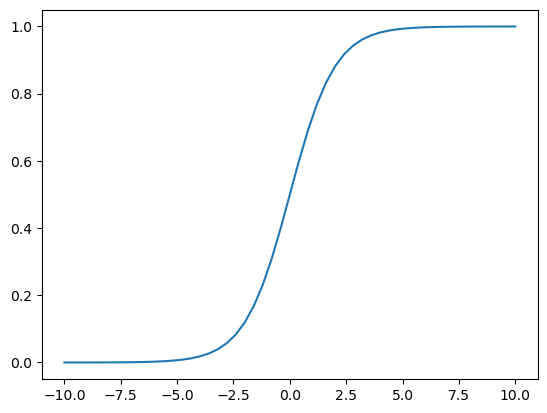

In [69]:
plt.plot(z, sigmoid(z))

In [71]:
def linear_regression(xi):
    result = w0

    for j in range(len(w)):
        result = result + xi[j] + w[j]

    return result

In [72]:
def logistic_regression(xi):
    score = w0

    for j in range(len(w)):
        score = score + xi[j] + w[j]

    result = sigmoid(score)
    return result

### **9. Training Logistic Regression with Scikit-Learn**

- Train a model with Scikit-Learn
- Apply it to the validation dataset
- Calculate the accuracy

In [73]:
from sklearn.linear_model import LogisticRegression

In [148]:
model = LogisticRegression()
model.fit(X_train_alt, y_train)

LogisticRegression()

In [149]:
model.intercept_

array([-0.09454695])

In [150]:
model.coef_[0].round(3)

array([-0.072,  0.003,  0.   , -0.024, -0.069, -0.132,  0.039, -0.115,
        0.022, -0.013, -0.08 ,  0.174, -0.267, -0.254,  0.174, -0.013,
       -0.334,  0.332, -0.09 ,  0.264, -0.09 , -0.266,  0.073, -0.09 ,
       -0.076,  0.078, -0.09 , -0.081,  0.207, -0.09 , -0.209, -0.042,
       -0.09 ,  0.039, -0.09 , -0.09 ,  0.087,  0.555, -0.152, -0.496,
       -0.224,  0.131, -0.091, -0.027,  0.055, -0.031])

In [151]:
y_pred = model.predict_proba(X_val_alt)[:, 1]
y_pred

array([0.00818216, 0.20650826, 0.21754754, ..., 0.14936949, 0.78346509,
       0.81509622])

In [152]:
churn_decision = (y_pred >= 0.5)

In [153]:
df_pred = pd.DataFrame()
df_pred['probability'] = y_pred
df_pred['prediction'] = churn_decision.astype(int)
df_pred['actual'] = y_val
df_pred['correct'] = df_pred['prediction'] == df_pred['actual']
df_pred

,probability,prediction,actual,correct
0,0.008182,0,0,True
1,0.206508,0,0,True
2,0.217548,0,0,True
3,0.560576,1,1,True
4,0.214757,0,0,True
...,...,...,...,...
1404,0.308644,0,0,True
1405,0.036655,0,1,False
1406,0.149369,0,0,True
1407,0.783465,1,1,True


In [154]:
df_pred['correct'].mean()

0.7991483321504613

### **10. Model Interpretation**

- Look at the coefficients
- Train a smaller model with fewer features

In [107]:
a = [1, 2, 3, 4]
b = 'abcd'

In [109]:
dict(zip(a, b))

{1: 'a', 2: 'b', 3: 'c', 4: 'd'}

In [157]:
dict(zip(X_val_alt.columns, model.coef_[0].round(3)))

{'tenure': -0.072,
 'monthlycharges': 0.003,
 'totalcharges': 0.0,
 'gender_female': -0.024,
 'gender_male': -0.069,
 'seniorcitizen_0': -0.132,
 'seniorcitizen_1': 0.039,
 'partner_no': -0.115,
 'partner_yes': 0.022,
 'dependents_no': -0.013,
 'dependents_yes': -0.08,
 'phoneservice_no': 0.174,
 'phoneservice_yes': -0.267,
 'multiplelines_no': -0.254,
 'multiplelines_no_phone_service': 0.174,
 'multiplelines_yes': -0.013,
 'internetservice_dsl': -0.334,
 'internetservice_fiber_optic': 0.332,
 'internetservice_no': -0.09,
 'onlinesecurity_no': 0.264,
 'onlinesecurity_no_internet_service': -0.09,
 'onlinesecurity_yes': -0.266,
 'onlinebackup_no': 0.073,
 'onlinebackup_no_internet_service': -0.09,
 'onlinebackup_yes': -0.076,
 'deviceprotection_no': 0.078,
 'deviceprotection_no_internet_service': -0.09,
 'deviceprotection_yes': -0.081,
 'techsupport_no': 0.207,
 'techsupport_no_internet_service': -0.09,
 'techsupport_yes': -0.209,
 'streamingtv_no': -0.042,
 'streamingtv_no_internet_serv

In [111]:
small = ['contract', 'tenure', 'monthlycharges']

In [112]:
df_train[small].iloc[:10].to_dict(orient='records')

[{'contract': 'two_year', 'tenure': 72, 'monthlycharges': 115.5},
 {'contract': 'month-to-month', 'tenure': 10, 'monthlycharges': 95.25},
 {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 75.55},
 {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 80.85},
 {'contract': 'two_year', 'tenure': 18, 'monthlycharges': 20.1},
 {'contract': 'month-to-month', 'tenure': 4, 'monthlycharges': 30.5},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 75.1},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 70.3},
 {'contract': 'two_year', 'tenure': 72, 'monthlycharges': 19.75},
 {'contract': 'month-to-month', 'tenure': 6, 'monthlycharges': 109.9}]

In [113]:
dicts_train_small = df_train[small].to_dict(orient='records')
dicts_val_small = df_val[small].to_dict(orient='records')

In [114]:
dv_small = DictVectorizer()
dv_small.fit(dicts_train_small)

DictVectorizer()

In [116]:
dv_small.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'monthlycharges', 'tenure'], dtype=object)

In [117]:
X_train_small = dv_small.transform(dicts_train_small)

In [118]:
model_small = LogisticRegression()
model.fit(X_train_small, y_train)

LogisticRegression()

In [120]:
w0 = model.intercept_[0]
w0

-2.4767756601883337

In [123]:
w = model.coef_[0]
w

array([ 0.97004491, -0.02513651, -0.94872202,  0.02748236, -0.03618424])

In [124]:
dict(zip(dv_small.get_feature_names_out(), w.round(3)))

{'contract=month-to-month': 0.97,
 'contract=one_year': -0.025,
 'contract=two_year': -0.949,
 'monthlycharges': 0.027,
 'tenure': -0.036}

In [129]:
-2.47 + (-0.949) + 100 * 0.027 + 24 * (-0.036)

-1.5829999999999997

In [130]:
sigmoid(_)

0.17037102838085472

### **11. Using the Model**

In [159]:
ohe_full_train = pd.get_dummies(df_full_train[categorical_vars], columns=categorical_vars).astype('int')
X_full_train = pd.concat([ohe_full_train, df_full_train[numerical_vars]], axis=1)
X_full_train.head()

,gender_female,gender_male,seniorcitizen_0,seniorcitizen_1,partner_no,partner_yes,dependents_no,dependents_yes,phoneservice_no,phoneservice_yes,...,contract_two_year,paperlessbilling_no,paperlessbilling_yes,paymentmethod_bank_transfer_(automatic),paymentmethod_credit_card_(automatic),paymentmethod_electronic_check,paymentmethod_mailed_check,tenure,monthlycharges,totalcharges
0,0,1,1,0,0,1,0,1,0,1,...,1,1,0,0,0,0,1,12,19.70,258.35
1,1,0,1,0,1,0,1,0,0,1,...,0,1,0,0,1,0,0,42,73.90,3160.55
2,0,1,1,0,0,1,1,0,0,1,...,1,1,0,1,0,0,0,71,65.15,4681.75
3,0,1,1,0,0,1,0,1,0,1,...,0,1,0,0,0,1,0,71,85.45,6300.85
4,0,1,1,0,1,0,1,0,0,1,...,0,1,0,0,0,1,0,30,70.40,2044.75


In [160]:
ohe_test = pd.get_dummies(df_test[categorical_vars], columns=categorical_vars).astype('int')
X_test = pd.concat([ohe_test, df_test[numerical_vars]], axis=1)
X_test.head()

,gender_female,gender_male,seniorcitizen_0,seniorcitizen_1,partner_no,partner_yes,dependents_no,dependents_yes,phoneservice_no,phoneservice_yes,...,contract_two_year,paperlessbilling_no,paperlessbilling_yes,paymentmethod_bank_transfer_(automatic),paymentmethod_credit_card_(automatic),paymentmethod_electronic_check,paymentmethod_mailed_check,tenure,monthlycharges,totalcharges
0,1,0,1,0,1,0,1,0,0,1,...,0,0,1,1,0,0,0,41,79.85,3320.75
1,1,0,0,1,1,0,1,0,0,1,...,1,0,1,1,0,0,0,66,102.40,6471.85
2,1,0,1,0,1,0,1,0,0,1,...,0,0,1,1,0,0,0,12,45.00,524.35
3,1,0,1,0,1,0,1,0,0,1,...,0,0,1,0,0,0,1,5,50.60,249.95
4,1,0,1,0,0,1,0,1,0,1,...,0,0,1,0,0,0,1,10,65.90,660.05


In [161]:
y_full_train = df_full_train['churn']

In [162]:
model = LogisticRegression()
model.fit(X_full_train, y_full_train)

LogisticRegression()

In [196]:
y_pred = model.predict_proba(X_test)[:, 1]
y_pred

array([0.05761075, 0.13660566, 0.321869  , ..., 0.00611074, 0.1824905 ,
       0.66592546])

In [164]:
churn_decision = (y_pred >= 0.5)

In [165]:
(churn_decision == y_test).mean()

0.8140525195173882

In [167]:
y_test

array([0, 0, 0, ..., 0, 0, 1])

In [171]:
customer = df_test.iloc[-1]
customer

customerid                9874-qlclh
gender                        female
seniorcitizen                      0
partner                          yes
dependents                       yes
tenure                            17
phoneservice                     yes
multiplelines                    yes
internetservice          fiber_optic
onlinesecurity                   yes
onlinebackup                      no
deviceprotection                 yes
techsupport                       no
streamingtv                      yes
streamingmovies                  yes
contract              month-to-month
paperlessbilling                 yes
paymentmethod       electronic_check
monthlycharges                 104.2
totalcharges                  1743.5
Name: 1408, dtype: object

In [189]:
ohe_customer = ohe_test.iloc[[-1]]
X_customer = pd.concat([ohe_customer, df_test.iloc[[-1]][numerical_vars]], axis=1)


In [190]:
X_customer

,gender_female,gender_male,seniorcitizen_0,seniorcitizen_1,partner_no,partner_yes,dependents_no,dependents_yes,phoneservice_no,phoneservice_yes,...,contract_two_year,paperlessbilling_no,paperlessbilling_yes,paymentmethod_bank_transfer_(automatic),paymentmethod_credit_card_(automatic),paymentmethod_electronic_check,paymentmethod_mailed_check,tenure,monthlycharges,totalcharges
1408,1,0,1,0,0,1,0,1,0,1,...,0,0,1,0,0,1,0,17,104.2,1743.5


In [197]:
model.predict_proba(X_customer)[0, 1]

0.6659254615060884

In [198]:
y_test[-1]

1

### **12. Summary**

- Feature importance - risk, mutual information, correlation
- One-hot encoding can be implemented with DictVectorizer
- Logistic regression - linear model like linear regression
- Output of log reg - probability
- Interpretation of weights is similar to linear regression

### **13. Explore More**

More things
- Try to exclude least useful features

Use scikit-learn in project of last week
- Re-implement train/val/test split using scikit-learn in the project from the last week
- Also, instead of our own linear regression, use LinearRegression (not regularized) and RidgeRegression (regularized). Find the best regularization parameter for Ridge

Other projects
- Lead scoring - https://www.kaggle.com/ashydv/leads-dataset
- Default prediction - https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients